<a href="https://colab.research.google.com/github/Kiel09/Diabetes-Prediction/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

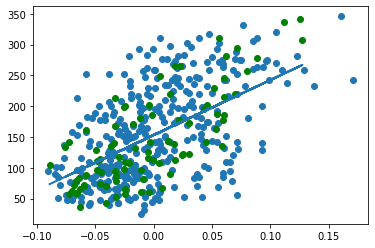

In [6]:
# -*- coding: utf-8 -*-
"""
Created on Wed Sep  4 02:07:42 2019
Revised and translated on Apr 2 11:49:40 2021
@author: ibrahim mert oğurcu
@editad: Ezekiel Donaire
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets


diabetes = datasets.load_diabetes()
    
print(diabetes.DESCR)

raw_data = diabetes.data
print(raw_data)

diabetes_df = pd.DataFrame(raw_data)
diabetes_df.head()

diabetes_df.columns = diabetes.feature_names
diabetes_df.head()


output_df = pd.DataFrame(diabetes.target, columns=["output"])
output_df.head()

all_df = pd.concat([diabetes_df, output_df], sort = False, axis = 1)
all_df.head()


X = diabetes_df['bmi'].values
Y = output_df.values



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=9)
X_train = X_train.reshape(-1,1)
X_test= X_test.reshape(-1,1)

plt.scatter(X_train, y_train)

from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)


diabetes_y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
print('Coefficient Value:', model.coef_)
print("Error Rate: %.2f" % mean_squared_error(y_test, diabetes_y_pred))
print('Variance Score: %.2f' % r2_score(y_test, diabetes_y_pred))


plt.scatter(X_test, y_test,  c='g')
plt.plot(X_test, diabetes_y_pred, linewidth=2)
plt.show()


